In [244]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
import yfinance as yf
import datetime 
start = datetime.datetime(2020,6,21) 
end = datetime.datetime(2021,6,21) 
Amazon = yf.Ticker("TCS.NS") 
df = Amazon.history(start=start, end=end)

In [176]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-22,2022.964205,2025.184531,1992.521084,2001.204956,3196138,0.0,0
2020-06-23,2000.267301,2017.043099,1983.491502,2008.457886,4205944,0.0,0
2020-06-24,2007.175038,2037.026092,2004.806666,2015.266846,2560937,0.0,0
2020-06-25,2008.161874,2032.832168,1982.751472,1989.511108,3043931,0.0,0
2020-06-26,1998.293634,2103.882483,1993.310187,2090.906006,6300722,0.0,0


In [177]:
df.shape

(249, 7)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-06-22 to 2021-06-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          249 non-null    float64
 1   High          249 non-null    float64
 2   Low           249 non-null    float64
 3   Close         249 non-null    float64
 4   Volume        249 non-null    int64  
 5   Dividends     249 non-null    float64
 6   Stock Splits  249 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.6 KB


In [179]:
df = df.dropna(axis=0)

In [180]:
df.shape

(249, 7)

In [181]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-22,2022.964205,2025.184531,1992.521084,2001.204956,3196138,0.0,0
2020-06-23,2000.267301,2017.043099,1983.491502,2008.457886,4205944,0.0,0
2020-06-24,2007.175038,2037.026092,2004.806666,2015.266846,2560937,0.0,0
2020-06-25,2008.161874,2032.832168,1982.751472,1989.511108,3043931,0.0,0
2020-06-26,1998.293634,2103.882483,1993.310187,2090.906006,6300722,0.0,0


In [182]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [183]:
data = df['Open'].copy()

In [184]:
data.head()

Date
2020-06-22    2022.964205
2020-06-23    2000.267301
2020-06-24    2007.175038
2020-06-25    2008.161874
2020-06-26    1998.293634
Name: Open, dtype: float64

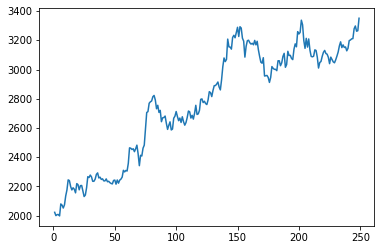

In [251]:
day_new=np.arange(1,250)
plt.plot(day_new,data)

In [185]:
test_data = data.iloc[220:240]
train_data = data.iloc[0:220]

In [186]:
timeseries_data = train_data.to_list()

In [187]:
n_steps = 10
X, y = prepare_data(timeseries_data, n_steps)

In [188]:
print(X[0]),print(y[0])

[2022.96420459 2000.26730051 2007.17503779 2008.16187422 1998.29363415
 2080.19921244 2072.3046271  2052.27225175 2074.27811672 2135.11491753]
2175.919899500187


(None, None)

In [189]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [190]:
X.shape

(210, 10, 1)

In [191]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
7/7 [==============================] - 2s 32ms/step - loss: 6382244.5000
Epoch 2/300
7/7 [==============================] - 0s 35ms/step - loss: 5859166.0000
Epoch 3/300
7/7 [==============================] - 0s 29ms/step - loss: 4185804.2500
Epoch 4/300
7/7 [==============================] - 0s 36ms/step - loss: 2381091.2500
Epoch 5/300
7/7 [==============================] - 0s 35ms/step - loss: 2490137.2500
Epoch 6/300
7/7 [==============================] - 0s 36ms/step - loss: 189661.5938
Epoch 7/300
7/7 [==============================] - 0s 30ms/step - loss: 10215.8174
Epoch 8/300
7/7 [==============================] - 0s 30ms/step - loss: 29400.2578
Epoch 9/300
7/7 [==============================] - 0s 34ms/step - loss: 13149.9795
Epoch 10/300
7/7 [==============================] - 0s 30ms/step - loss: 13489.6562
Epoch 11/300
7/7 [==============================] - 0s 29ms/step - loss: 11582.8877
Epoch 12/300
7/7 [==============================] - 0s 32ms/step - loss: 1

In [192]:
def predict_next(x_input,length,days):
    x_input = np.array(x_input)
    temp_input=list(x_input)
    lst_output=[]
    i=0
    while(i<days):
        
        if(len(temp_input)>length):
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1
        
    return lst_output

In [193]:
test_data.shape

(20,)

In [194]:
test_data = test_data.to_list()

In [227]:
outs = predict_next(test_data[0:10],10,10)

[3120.9001]
1 day input [3109.78836677 3104.81274566 3083.41721085 3040.12917165 3084.91008143
 3068.98782307 3052.1702726  3046.09980402 3066.5        3120.90014648]
1 day output [[3110.0732]]
2 day input [3104.81274566 3083.41721085 3040.12917165 3084.91008143 3068.98782307
 3052.1702726  3046.09980402 3066.5        3120.90014648 3110.07324219]
2 day output [[3103.834]]
3 day input [3083.41721085 3040.12917165 3084.91008143 3068.98782307 3052.1702726
 3046.09980402 3066.5        3120.90014648 3110.07324219 3103.83398438]
3 day output [[3110.8237]]
4 day input [3040.12917165 3084.91008143 3068.98782307 3052.1702726  3046.09980402
 3066.5        3120.90014648 3110.07324219 3103.83398438 3110.82373047]
4 day output [[3109.5251]]
5 day input [3084.91008143 3068.98782307 3052.1702726  3046.09980402 3066.5
 3120.90014648 3110.07324219 3103.83398438 3110.82373047 3109.52514648]
5 day output [[3116.0237]]
6 day input [3068.98782307 3052.1702726  3046.09980402 3066.5        3120.90014648
 311

In [228]:
outs

[3120.9001,
 3110.0732,
 3103.834,
 3110.8237,
 3109.5251,
 3116.0237,
 3114.35,
 3115.8408,
 3126.476,
 3137.3403]

In [229]:
lst_output = outs

In [230]:
lst_output

[3120.9001,
 3110.0732,
 3103.834,
 3110.8237,
 3109.5251,
 3116.0237,
 3114.35,
 3115.8408,
 3126.476,
 3137.3403]

In [232]:
len(train_data),len(test_data)

(220, 20)

In [233]:
day_new=np.arange(1,221)
day_pred=np.arange(221,231)

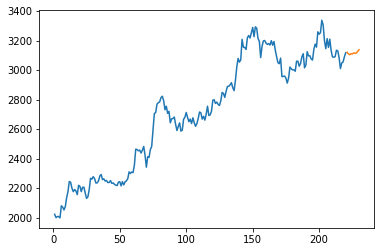

In [234]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)

In [235]:
lst_output

[3120.9001,
 3110.0732,
 3103.834,
 3110.8237,
 3109.5251,
 3116.0237,
 3114.35,
 3115.8408,
 3126.476,
 3137.3403]

In [236]:
compare = test_data[10:21]

In [237]:
error = []
for i in range(len(lst_output)):
  print('Predicted amount is {} and actual amount is {}'.format(lst_output[i],compare[i]))
  error.append(abs(lst_output[i]-compare[i]))

Predicted amount is 3120.900146484375 and actual amount is 3092.0
Predicted amount is 3110.0732421875 and actual amount is 3120.0
Predicted amount is 3103.833984375 and actual amount is 3161.949951171875
Predicted amount is 3110.82373046875 and actual amount is 3189.5
Predicted amount is 3109.525146484375 and actual amount is 3150.0
Predicted amount is 3116.023681640625 and actual amount is 3168.60009765625
Predicted amount is 3114.35009765625 and actual amount is 3150.85009765625
Predicted amount is 3115.8408203125 and actual amount is 3154.550048828125
Predicted amount is 3126.47607421875 and actual amount is 3128.0
Predicted amount is 3137.34033203125 and actual amount is 3145.0


In [238]:
err = np.array(error)
np.mean(err)

35.3063232421875

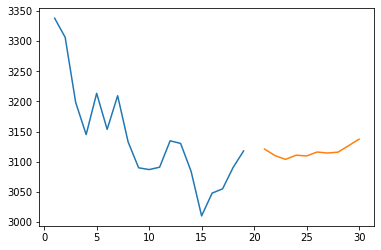

In [239]:
day_new=np.arange(1,20)
day_pred=np.arange(21,31)
plt.plot(day_new,timeseries_data[201:221])
plt.plot(day_pred,lst_output)

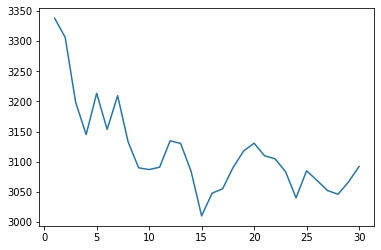

In [254]:
day_new=np.arange(1,31)
plt.plot(day_new,data[201:231])

In [240]:
from keras.models import load_model
model.save("TCS_Stocks.h5")

In [241]:
loaded_model = load_model("TCS_Stocks.h5")